In [2]:
%matplotlib inline
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pybedtools
import pyBigWig
import seaborn as sns
from IPython.core.display import HTML
from gscripts.general import dataviz

from gscripts.rnaseq import splicing_map

img_dir = "/home/gpratt/Dropbox/NatMethodsPaper/splice_maps/"

In [3]:
def modify_plot(df):
    df = df[df.sum(axis=1) > 5]
    min_normalized_read_number = min([item for item in df.unstack().values if item > 0])
    df = df + min_normalized_read_number
    return df.div(df.sum(axis=1), axis=0).dropna().mean()
    #return df.mean()

def plot_splice_map(rbp, splicing_events, out_name):
    linewidth = 2.5
    max_height = .0040
    min_height = .0025
    significant_splicing_events = splicing_events[splicing_events.bayes_factor > 5]
    #background_events = splicing_events[splicing_events.bayes_factor < 10]
    
    included_events = significant_splicing_events[significant_splicing_events['diff'] > .1]
    excluded_events = significant_splicing_events[significant_splicing_events['diff'] < -.1]
    background_events = significant_splicing_events[(significant_splicing_events['diff'] >= -.1) & (significant_splicing_events['diff'] <= .1)]
    print len(significant_splicing_events)
    print len(included_events)
    print len(excluded_events)
    print len(background_events)
    inc_three_prime_upstream, inc_five_prime_se, inc_three_prime_se, inc_five_prime_downstream = plot_miso(included_events.event_name, rbp)
    exc_three_prime_upstream, exc_five_prime_se, exc_three_prime_se, exc_five_prime_downstream = plot_miso(excluded_events.event_name, rbp)
    bg_three_prime_upstream, bg_five_prime_se, bg_three_prime_se, bg_five_prime_downstream = plot_miso(background_events.event_name, rbp)

    num_rows = 1
    num_cols = 4
    with dataviz.Figure(os.path.join(img_dir, out_name), figsize=(num_cols * 2.5,num_rows * 2.5)) as fig:
        ax = fig.add_subplot(1,4,1)
        ax.plot(modify_plot(inc_three_prime_upstream), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(exc_three_prime_upstream), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(bg_three_prime_upstream), linewidth=linewidth, alpha=.7, color='.7')

        sns.despine(ax=ax)
        ax.set_ylim(min_height, max_height)
        ax.set_xticklabels(np.arange(-50, 301, 50))
        ax.set_ylabel("Mean Read Density")
        
        ax = fig.add_subplot(1,4,2)
        ax.plot(modify_plot(inc_five_prime_se), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(exc_five_prime_se), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(bg_five_prime_se), linewidth=linewidth, alpha=.7, color='.7')

        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        ax.set_xticklabels(np.arange(-300, 51, 50))
        ax.set_yticklabels([])

        ax = fig.add_subplot(1,4,3)
        ax.plot(modify_plot(inc_three_prime_se), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(exc_three_prime_se), linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(bg_three_prime_se), linewidth=linewidth, alpha=.7, color='.7')

        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        ax.set_xticklabels(np.arange(-50, 301, 50))
        ax.set_yticklabels([])

        ax = fig.add_subplot(1,4,4)
        ax.plot(modify_plot(inc_five_prime_downstream), label="Included", linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(exc_five_prime_downstream), label="Excluded", linewidth=linewidth, alpha=.7)
        ax.plot(modify_plot(bg_five_prime_downstream), label="Background", linewidth=linewidth, alpha=.7, color='.7')
        ax.legend()
        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        ax.set_yticklabels([])
        ax.set_xticklabels(np.arange(-300, 51, 50))


707
188
446
73


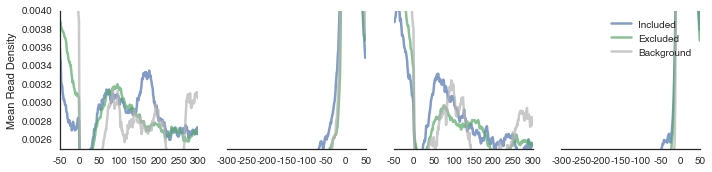

In [5]:
u2af2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/272_01_U2AF2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/272_01_U2AF2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/U2AF2_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(u2af2, miso_splicing_calls, "272_01_U2AF2.splice_map.svg")

0
0
0
0


ValueError: min() arg is an empty sequence

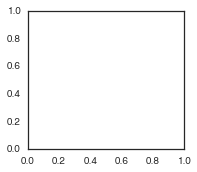

In [6]:
#this is blank because it didn't generate
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/345_01_PCBP2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/345_01_PCBP2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/pcbp2_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "345_01_PCBP2.splice_map.svg")

In [24]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/218_01_TRA2A.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/218_01_TRA2A.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/tra2a_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "218_01_TRA2A.splice_map.svg")

KeyError: 'P-value'

66
19
20
27


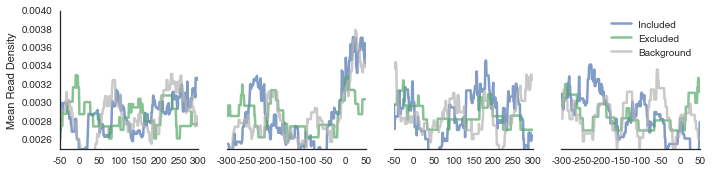

In [176]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/326_01_HNRNPK.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/326_01_HNRNPK.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/HNRNPK_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "206_01_HNRNPK.splice_map.svg")

2594
720
797
1077


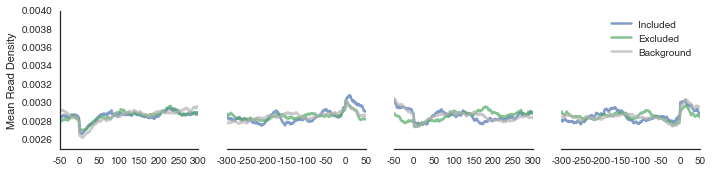

In [177]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/326_02_HNRNPK.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/326_02_HNRNPK.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/HNRNPK_rep2/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "206_02_HNRNPK.splice_map.svg")

3692
1169
1034
1489


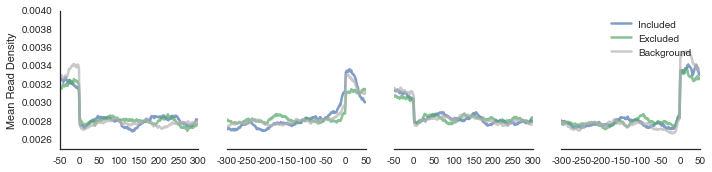

In [178]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/368_01_PTBP1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/368_01_PTBP1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/PTBP1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "368_01_PTBP1.splice_map.svg")

3207
934
922
1351


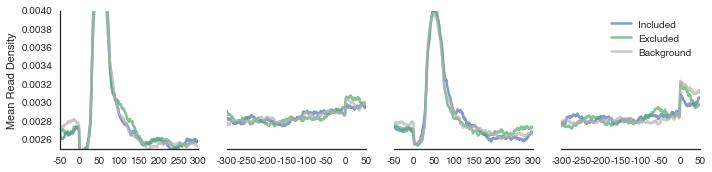

In [179]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/331_01_RBM22.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/331_01_RBM22.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/RBM22_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "331_01_RBM22.splice_map.svg")

3387
914
1156
1317


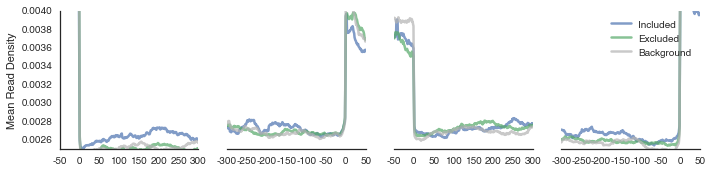

In [180]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/350_01_DDX3X.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/350_01_DDX3X.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/DDX3X/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "DDX3X.splice_map.svg")

3028
924
790
1314


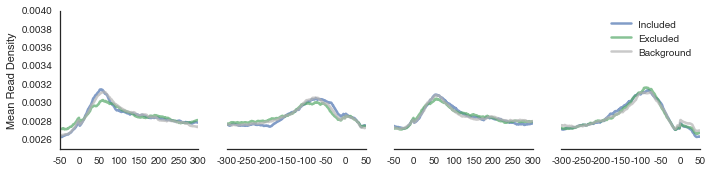

In [181]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/439_01_KHSRP.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/439_01_KHSRP.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/KHSRP_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "439_01_KHSRP.splice_map.svg")

3005
855
880
1270


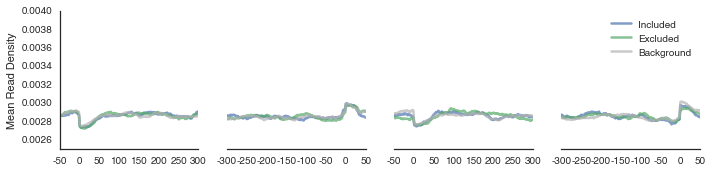

In [182]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/478_01_QKI.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/478_01_QKI.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/QKI_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "478_01_QKI.splice_map.svg")

3045
866
830
1349


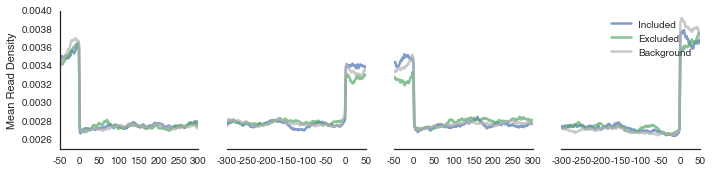

In [183]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/220_02_IGF2BP1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/220_02_IGF2BP1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/igf2bp1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "331_01_RBM22.splice_map.svg")

2730
886
639
1205


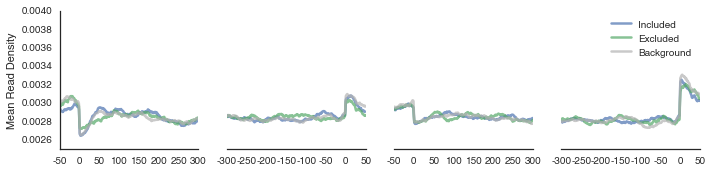

In [184]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/384_01_GTF2F1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/384_01_GTF2F1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/gtf2f1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "384_01_GTF2F1.splice_map.svg")

2789
797
805
1187


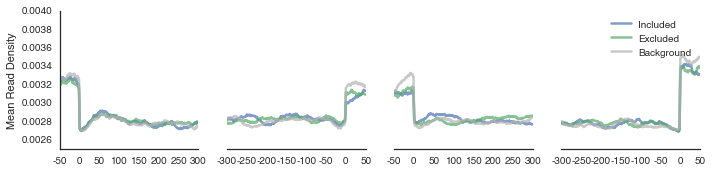

In [185]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/205_01_IGF2BP1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/205_01_IGF2BP1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/igf2bp1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "205_01_IGF2BP1.splice_map.svg")

In [186]:
# pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/227_01_SLTM.merged.r2.norm.neg.bw", 
#                     neg="/projects/ps-yeolab2/encode/analysis/encode_v12/227_01_SLTM.merged.r2.norm.pos.bw")
# miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/sltm_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

# plot_splice_map(pcbp2, miso_splicing_calls, "227_01_SLTM.splice_map.svg")

2949
883
887
1179


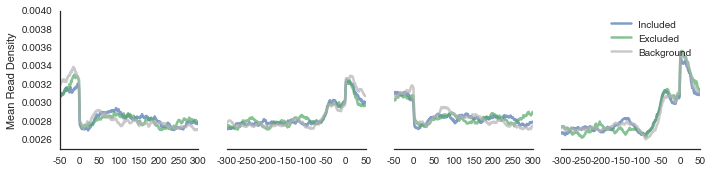

In [187]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/344_01_SMNDC1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/344_01_SMNDC1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/smndc1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "344_01_SMNDC1.splice_map.svg")

2790
843
787
1160


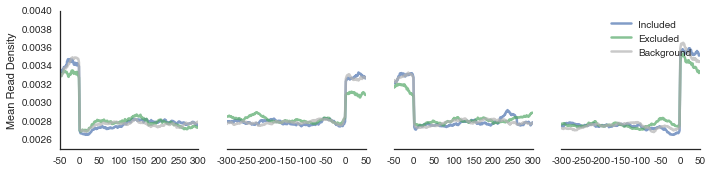

In [188]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/302_01_SND1.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/302_01_SND1.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/snd1_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "302_01_SND1.splice_map.svg")

2898
844
774
1280


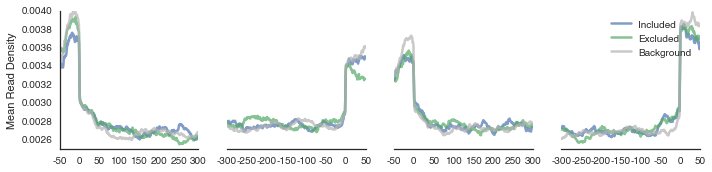

In [189]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/218_01_TRA2A.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/218_01_TRA2A.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/tra2a_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "218_01_TRA2A.splice_map.svg")

139
35
44
60


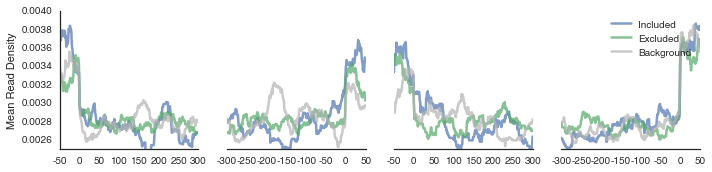

In [190]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/480_01_XRCC6.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/480_01_XRCC6.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/xrcc6_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "480_01_XRCC6.splice_map.svg")

167
72
89
6


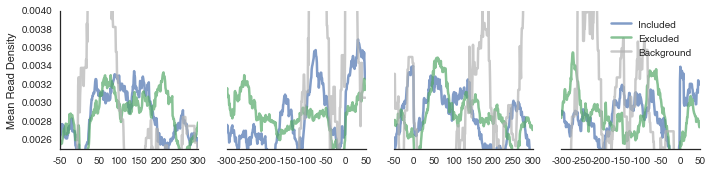

In [13]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/oasis/tscc/scratch/elvannostrand/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/RBFOX2_rep1_ctrl1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "204_02_RBFOX2.splice_map.svg")

In [ ]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/oasis/tscc/scratch/elvannostrand/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/RBFOX2_rep1_ctrl1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "204_02_RBFOX2.splice_map.svg")

In [6]:
def check_event_order(item):
    first, middle, last = item.split("@")
    first_start = int(first.split(":")[2])
    middle_start = int(middle.split(":")[2])
    last_start = int(last.split(":")[2])
    return first < middle < last
    

In [8]:
splicing = pd.read_table("/home/elvannostrand/data/clip/CLIPseq_analysis/Method_paper_figures/RBFOX2_150_vs_NTC_SE_RI_alt5_alt3_050414.signifSimple_20160121.csv", 
                         names=['event_type', "GeneID", "EventPosition", "SepScore", "P-value", "direction"],
                        skiprows=1)

se_splicing = splicing[splicing.event_type == "SE"].copy()
se_splicing = se_splicing.drop([196, 15, 109, 134, 109, 162, 168])
se_splicing['event_name'] = se_splicing.EventPosition.apply(reformat_geneid)

191
83
108


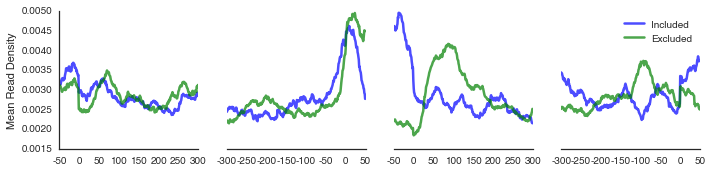

In [9]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/293XT_CLIP_RBFOX2_1120_RBFOX2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/293XT_CLIP_RBFOX2_1120_RBFOX2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/home/elvannostrand/scratch/ENCODE_rnaseq/bam_files_shashank/HepG2/clip_and_RNASeq_common_datasets/miso/miso_comparisons/xrcc6_rep1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, se_splicing, os.path.join(img_dir, "RBFOX2.splice_map.svg"))

In [37]:
pcbp2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.pos.bw")
miso_splicing_calls = pd.read_table("/oasis/tscc/scratch/elvannostrand/ENCODE_rnaseq/bam_files_shashank/K562/clip_and_RNASeq_common_datasets/miso/miso_comparisons/RBFOX2_rep1_ctrl1/SE_vs_SE/bayes-factors/SE_vs_SE.miso_bf")

plot_splice_map(pcbp2, miso_splicing_calls, "204_02_RBFOX2.splice_map.svg")

KeyError: 'P-value'

#rMATs plotting

In [14]:
rMATS = pd.read_table("/home/gpratt/projects/encode/analysis/ad-hoc/rMATS_out/MATS_output/SE.MATS.JunctionCountOnly.txt")
sig_rMATS = rMATS[rMATS.FDR < .05].copy()
sig_rMATS['event_name'] = sig_rMATS.apply(splicing_map.mats_reformat_geneid, axis=1)
sig_rMATS['direction'] = sig_rMATS.apply(splicing_map.mats_get_direction, axis=1)
sig_rMATS['P-value'] = sig_rMATS.PValue

In [16]:
len(sig_rMATS)

315

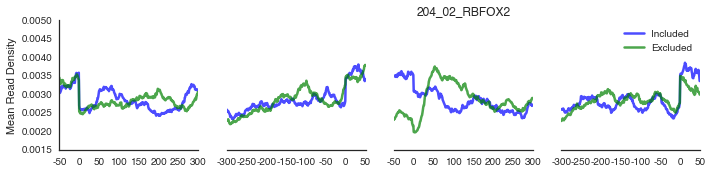

In [15]:
pcbp2 = splicing_map.ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/204_02_RBFOX2.merged.r2.norm.pos.bw")

splicing_map.plot_splice_map(pcbp2, sig_rMATS,  "204_02_RBFOX2", os.path.join(img_dir, "204_02_RBFOX2.splice_map.svg"))

#This is something else, general plotting

In [76]:
def modify_plot(df):
    #df = df[df.sum(axis=1) > 5]
    min_normalized_read_number = min([item for item in df.unstack().values if item > 0])
    df = df + min_normalized_read_number
    df = df.div(df.sum(axis=1), axis=0).dropna()
    return df.mean()
    return df

In [49]:
exc = se_splicing[se_splicing.direction == "excluded"]
exc_three_prime_upstream, exc_five_prime_se, exc_three_prime_se, exc_five_prime_downstream = plot_miso(exc.event_name, pcbp2)

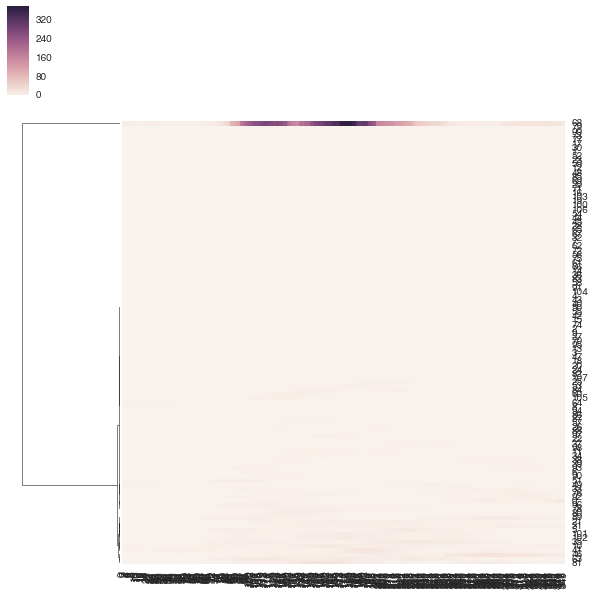

In [85]:
sns.clustermap(exc_three_prime_se, col_cluster=False)

In [51]:
inc = se_splicing[se_splicing.direction == "included"]
inc_three_prime_upstream, inc_five_prime_se, inc_three_prime_se, inc_five_prime_downstream = plot_miso(inc.event_name, pcbp2)

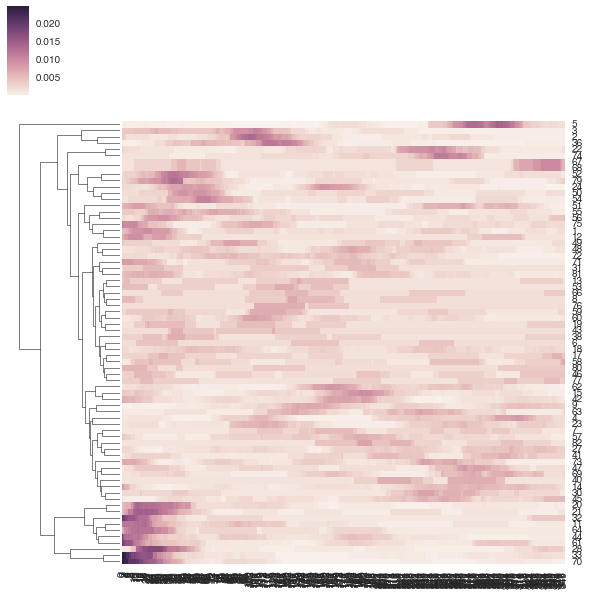

In [52]:
sns.clustermap(inc_three_prime_se), col_cluster=False)

#Cryptic Splicing Splicing Maps

In [7]:
cryptic_splicing = pybedtools.BedTool("/home/gpratt/ipython_notebook/cryptic_exons/ling_et_al_exons.bed")

In [8]:
annotated_genes = pybedtools.BedTool("/home/gpratt/clipper/clipper/data/regions/hg19_genes.bed")

In [38]:
def adjust_strand(interval):
    interval.strand = interval[8]
    return interval

In [41]:
annotated_splice_events = cryptic_splicing.intersect(annotated_genes, wo=True).saveas()
annotated_splice_events = annotated_splice_events.each(adjust_strand).saveas()

In [23]:
TARDBP_340_rep1 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/340_01_TARDBP.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/340_01_TARDBP.merged.r2.norm.pos.bw")

TARDBP_340_rep2 = ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/340_02_TARDBP.merged.r2.norm.neg.bw", 
                    neg="/projects/ps-yeolab2/encode/analysis/encode_v12/340_02_TARDBP.merged.r2.norm.pos.bw")

In [70]:
five_prime_se = []
for interval in annotated_splice_events:
    wiggle = five_prime_site(TARDBP_340_rep1, interval)

    #if not all(np.isnan(wiggle)):
    five_prime_se.append(wiggle)

five_prime_se = np.abs(pd.DataFrame(five_prime_se).fillna(0))

three_prime_se = []
for interval in annotated_splice_events:
    wiggle = three_prime_site(TARDBP_340_rep1, interval)

    #if not all(np.isnan(wiggle)):
    three_prime_se.append(wiggle)

three_prime_se = np.abs(pd.DataFrame(three_prime_se).fillna(0))

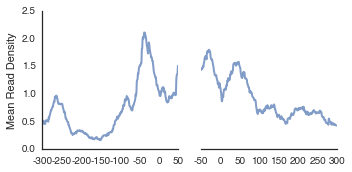

In [83]:

num_rows = 1
num_cols = 2
with dataviz.Figure(os.path.join(img_dir, "tdp43_cryptic_splicing_rep1.svg"), figsize=(num_cols * 2.5,num_rows * 2.5)) as fig:

    ax = fig.add_subplot(1,2,1)
    ax.plot(five_prime_se.mean(), linewidth=2, alpha=.7)
    sns.despine(ax=ax)
    ax.set_ylim(0, 2.5)

    ax.set_xticklabels(np.arange(-300, 51, 50))
    ax.set_ylabel("Mean Read Density")

    ax = fig.add_subplot(1,2,2)
    ax.plot(three_prime_se.mean(), linewidth=2, alpha=.7)

    sns.despine(ax=ax, left=True)
    ax.set_ylim(0, 2.5)
    ax.set_xticklabels(np.arange(-50, 301, 50))
    ax.set_yticklabels([])

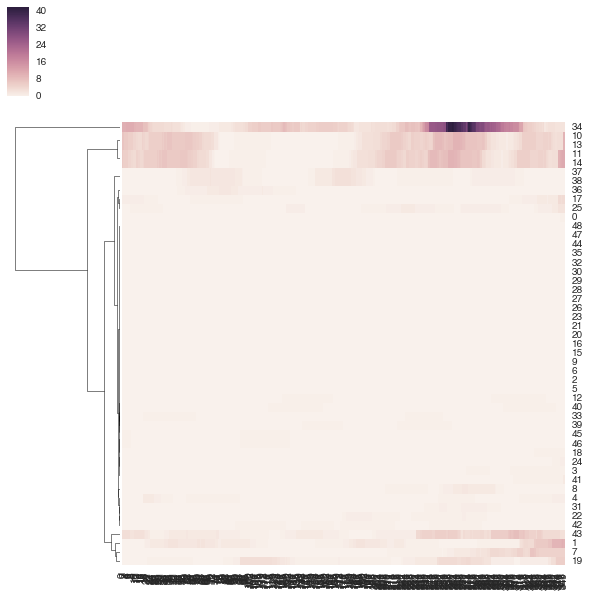

In [77]:
sns.clustermap(five_prime_se, col_cluster=False)

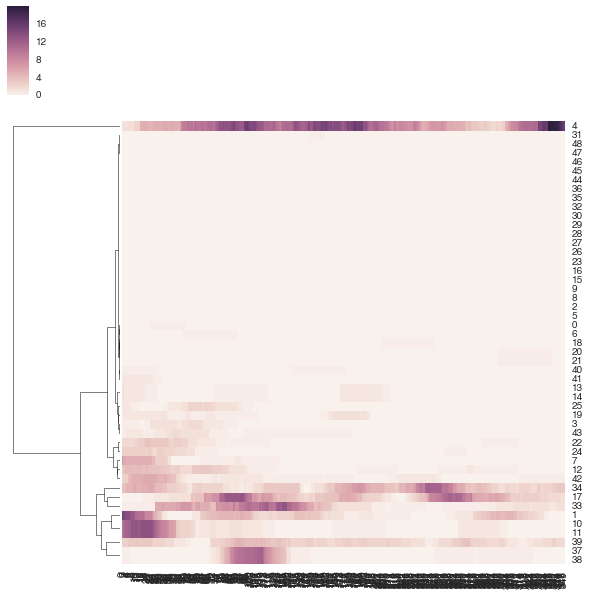

In [78]:
sns.clustermap(three_prime_se, col_cluster=False)

In [79]:
five_prime_se = []
for interval in annotated_splice_events:
    wiggle = five_prime_site(TARDBP_340_rep2, interval)

    #if not all(np.isnan(wiggle)):
    five_prime_se.append(wiggle)

five_prime_se = np.abs(pd.DataFrame(five_prime_se).fillna(0))

three_prime_se = []
for interval in annotated_splice_events:
    wiggle = three_prime_site(TARDBP_340_rep2, interval)

    #if not all(np.isnan(wiggle)):
    three_prime_se.append(wiggle)

three_prime_se = np.abs(pd.DataFrame(three_prime_se).fillna(0))

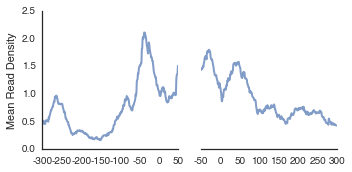

In [84]:
num_rows = 1
num_cols = 2
with dataviz.Figure(os.path.join(img_dir, "tdp43_cryptic_splicing_rep2.svg"), figsize=(num_cols * 2.5,num_rows * 2.5)) as fig:

    ax = fig.add_subplot(1,2,1)
    ax.plot(five_prime_se.mean(), linewidth=2, alpha=.7)
    sns.despine(ax=ax)
    ax.set_ylim(0, 2.5)
    ax.set_ylabel("Mean Read Density")

    ax.set_xticklabels(np.arange(-300, 51, 50))

    ax = fig.add_subplot(1,2,2)
    ax.plot(three_prime_se.mean(), linewidth=2, alpha=.7)

    sns.despine(ax=ax, left=True)
    ax.set_ylim(0, 2.5)
    ax.set_xticklabels(np.arange(-50, 301, 50))
    ax.set_yticklabels([])

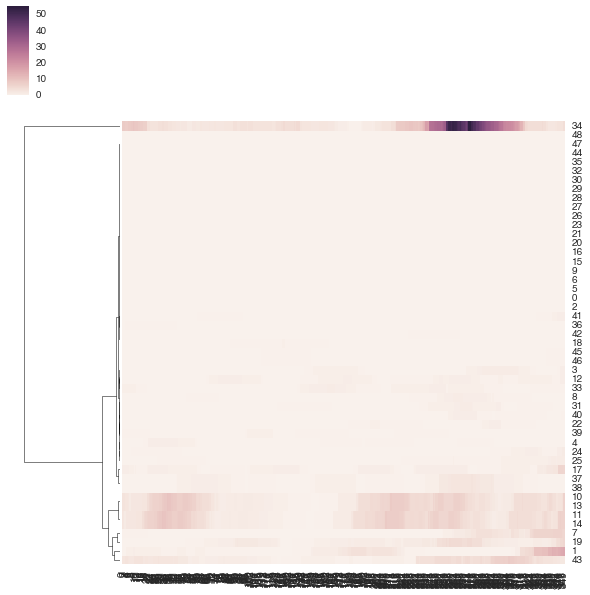

In [81]:
sns.clustermap(five_prime_se, col_cluster=False)

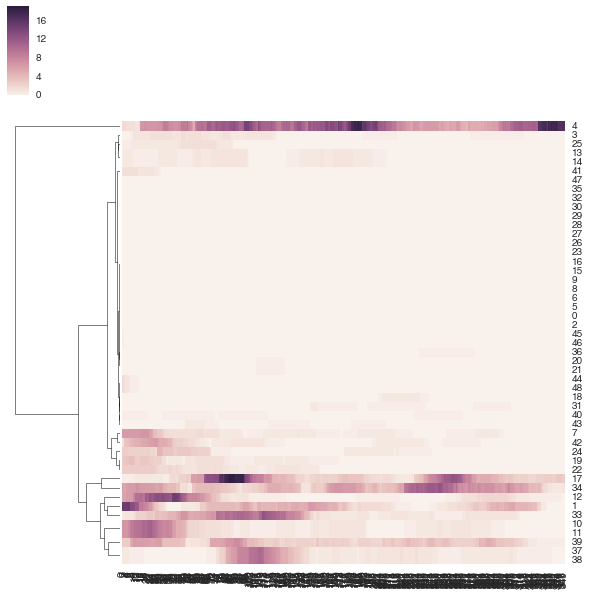

In [82]:
sns.clustermap(three_prime_se, col_cluster=False)

#Are there enriched RBPs near cryptic events?

In [61]:
names = ['cryptic_chrom', 'cryptic_start', "cryptic_stop",
         'rbp_chrom', 'rbp_start', 'rbp_stop', 'rbp_name', 'rbp_score', 'rbp_strand', "rbp_foo", 'rbp_bar', 'rbp_color', 'foo', 'bar', 'baz', 'buz']


In [62]:
cryptic_events = cryptic_splicing.intersect("/home/gpratt/Dropbox/cryptic_splicing/data/clip/encode_v12_filelist.allencode_20160226.txt.K562_allpeaks_ENCODEv12.colored.bed",
                          wo=True)

In [63]:
cryptic_events_slop = cryptic_splicing.slop(b=500, g="/projects/ps-yeolab/genomes/hg19/hg19.chrom.sizes").intersect("/home/gpratt/Dropbox/cryptic_splicing/data/clip/encode_v12_filelist.allencode_20160226.txt.K562_allpeaks_ENCODEv12.colored.bed",
                          wo=True)

In [64]:
cryptic_events_df = cryptic_events.to_dataframe(names=names)
cryptic_events_slop_df = cryptic_events_slop.to_dataframe(names=names)

In [65]:
cryptic_binding_counts = cryptic_events_df.groupby(["cryptic_chrom", 'cryptic_start', 'cryptic_stop', 'rbp_name']).count().rbp_chrom 
cryptic_events_slop_counts = cryptic_events_slop_df.groupby(["cryptic_chrom", 'cryptic_start', 'cryptic_stop', 'rbp_name']).count().rbp_chrom 

In [66]:
cryptic_binding_counts.unstack()

rbp_name                                  AKAP8L  BUD13  CSTF2T  DDX24  DDX3X  \
cryptic_chrom cryptic_start cryptic_stop                                        
chr1          980268        980367           NaN    NaN     NaN    NaN    NaN   
                            980460           NaN    NaN     NaN    NaN    NaN   
              980272        980367           NaN    NaN     NaN    NaN    NaN   
                            980460           NaN    NaN     NaN    NaN    NaN   
chr10         3141749       3142011          NaN    NaN     NaN    NaN    NaN   
chr11         108368528     108368891        NaN    NaN     NaN    NaN      1   
chr12         117227839     117228527        NaN    NaN     NaN    NaN    NaN   
chr15         72557611      72557753         NaN    NaN     NaN      1    NaN   
chr19         4492012       4492149          NaN    NaN     NaN    NaN    NaN   
chr2          3462025       3462286          NaN    NaN     NaN    NaN    NaN   
              242608197     242608400        NaN      1     NaN    NaN    NaN   
chr22         20110103      20110220           1    NaN       4    NaN    NaN   
chr5          648215        648338           NaN    NaN     NaN    NaN    NaN   
chr6          33626324      33626446         NaN    NaN     NaN    NaN    NaN   

rbp_name                                  EIF4G2  EWSR1  FAM120A  FASTKD2  \
cryptic_chrom cryptic_start cryptic_stop                                    
chr1          980268        980367           NaN    NaN      NaN      NaN   
                            980460           NaN    NaN      NaN      NaN   
              980272        980367           NaN    NaN      NaN      NaN   
                            980460           NaN    NaN      NaN      NaN   
chr10         3141749       3142011          NaN    NaN      NaN      NaN   
chr11         108368528     108368891        NaN    NaN      NaN      NaN   
chr12         117227839     117228527          1    NaN      NaN      NaN   
chr15         72557611      72557753         NaN    NaN      NaN      NaN   
chr19         4492012       4492149            2    NaN      NaN      NaN   
chr2          3462025       3462286          NaN    NaN      NaN      NaN   
              242608197     242608400        NaN    NaN      NaN      NaN   
chr22         20110103      20110220           6      5        4        1   
chr5          648215        648338           NaN    NaN      NaN      NaN   
chr6          33626324      33626446         NaN    NaN      NaN      NaN   

rbp_name                                  GTF2F1  PRPF8  RBM5  SF3B1  SSRP1  \
cryptic_chrom cryptic_start cryptic_stop                                      
chr1          980268        980367           NaN    NaN   NaN    NaN    NaN   
                            980460           NaN    NaN   NaN    NaN    NaN   
              980272        980367           NaN    NaN   NaN    NaN    NaN   
                            980460           NaN    NaN   NaN    NaN    NaN   
chr10         3141749       3142011          NaN    NaN   NaN    NaN    NaN   
chr11         108368528     108368891        NaN    NaN   NaN    NaN    NaN   
chr12         117227839     117228527        NaN    NaN   NaN    NaN    NaN   
chr15         72557611      72557753         NaN    NaN   NaN    NaN    NaN   
chr19         4492012       4492149          NaN    NaN   NaN    NaN    NaN   
chr2          3462025       3462286          NaN    NaN   NaN    NaN    NaN   
              242608197     242608400        NaN      2   NaN    NaN    NaN   
chr22         20110103      20110220           3      2     1      2      1   
chr5          648215        648338           NaN    NaN   NaN    NaN    NaN   
chr6          33626324      33626446         NaN    NaN   NaN    NaN    NaN   

rbp_name                                  TAF15  TARDBP  ZFC3H1  
cryptic_chrom cryptic_start cryptic_stop                         
chr1          980268        980367          NaN       2       1  
       

In [27]:
#pd.read_table("/home/gpratt/Dropbox/ENCODE_RBP (1)/Integrated_analysis_directory/shRNA Followed by RNA-Seq/MISO_dPSI (up to set 24)/SE_compareMiso_total_summary.txt")


In [68]:
HTML(cryptic_events_slop_counts.unstack().to_html())

Interesting observation, of the events that overlap, mostly TDP-43 is directly regulating.  However, there is also some s

#Lets rock this for all the RNAi data now

In [61]:
master_processing_table = pd.read_table("/home/elvannostrand/data/ENCODE/project_stuff/ENCODE_MASTER_ID_LIST_20160301_AllDatasets.txt", 
                                        sep="\t",
                                        skiprows=1,
                                        names=["UID", "RBP_gID", "CellLine", "RBP_ENSG", "Antibody", "Lot", "CLIP_ENCODEAccID", "CLIP_Rep1ENC", "CLIP_Rep2ENC", "CLIP_InputENC", "RNASEQ_ENCODEAccID",  "Duplicate_RNASEQ_ENCODEAccID", "RNASEQ_ControlENC", "RNASEQ_KDRep1Bam", "RNASEQ_KDRep2Bam", "RNASEQ_ControlRep1Bam", "RNASEQ_ControlRep2Bam", "bar"]
)

In [62]:
encode_events = glob.glob("/home/gpratt/projects/encode/analysis/ad-hoc/rMATS/*")
encode_events = pd.DataFrame(pd.Series({os.path.basename(item): item for item in encode_events}, name="events"))
encode_events['SE'] = encode_events.events.apply(lambda x: os.path.join(x, "MATS_output", "SE.MATS.JunctionCountOnly.txt"))
encode_events['MXE'] = encode_events.events.apply(lambda x: os.path.join(x, "MATS_output", "MXE.MATS.JunctionCountOnly.txt"))
encode_events['A5SS'] = encode_events.events.apply(lambda x: os.path.join(x, "MATS_output", "A5SS.MATS.JunctionCountOnly.txt"))
encode_events['A3SS'] = encode_events.events.apply(lambda x: os.path.join(x, "MATS_output", "A3SS.MATS.JunctionCountOnly.txt"))
encode_events['RI'] = encode_events.events.apply(lambda x: os.path.join(x, "MATS_output", "RI.MATS.JunctionCountOnly.txt"))

encode_events = encode_events[encode_events.SE.apply(os.path.exists)]

In [63]:
se = pd.concat({key: pd.read_table(value, index_col=0) for key, value in encode_events.SE.iteritems()}, names=["condition", "event_id"])
mxe = pd.concat({key: pd.read_table(value, index_col=0) for key, value in encode_events.MXE.iteritems()}, names=["condition", "event_id"])
a5ss = pd.concat({key: pd.read_table(value, index_col=0) for key, value in encode_events.A5SS.iteritems()}, names=["condition", "event_id"])
a3ss = pd.concat({key: pd.read_table(value, index_col=0) for key, value in encode_events.A3SS.iteritems()}, names=["condition", "event_id"])
ri = pd.concat({key: pd.read_table(value, index_col=0) for key, value in encode_events.RI.iteritems()}, names=["condition", "event_id"])

In [64]:
sig_rMATS = se[se.FDR < .05].copy()
sig_rMATS['event_name'] = sig_rMATS.apply(splicing_map.mats_reformat_geneid, axis=1)
sig_rMATS['direction'] = sig_rMATS.apply(splicing_map.mats_get_direction, axis=1)
sig_rMATS['P-value'] = sig_rMATS.PValue

new_index = []
for condition, event_id in sig_rMATS.index:
    try:
        info = master_processing_table[master_processing_table.RNASEQ_ENCODEAccID == condition.split("_vs_")[0]].iloc[0]
        rbp = info.RBP_gID 
        cell_line = info.CellLine
        both = rbp + "_" + cell_line
        uid = info.UID
    except Exception as e:
        rbp = np.nan
        cell_line = np.nan
        both = np.nan
        uid = np.nan

    new_index.append([uid,
                      condition,
                      rbp, 
                      cell_line,
                      both,
                      event_id])

sig_rMATS.index = pd.MultiIndex.from_tuples(new_index, names= ['uid', 'condition', 'rbp', 'cell_type', 'both', 'event_id'])

Received an error during file opening!
207 MAGOH HEPG2
min() arg is an empty sequence
237 FXR2 K562
Received an error during file opening!
238 SRSF9 K562
Received an error during file opening!
239 SRSF7 K562
Received an error during file opening!
248 AGO1 K562
Received an error during file opening!
250 HNRNPF K562
Received an error during file opening!
252 DDX27 K562
Received an error during file opening!
253 TFIP11 K562
min() arg is an empty sequence
256 SLTM K562
Received an error during file opening!
259 CPSF7 K562
Received an error during file opening!
269 SRSF5 K562
Received an error during file opening!
273 EWSR1 K562
Received an error during file opening!
276 SF3B4 K562
Received an error during file opening!
277 G3BP2 K562
min() arg is an empty sequence
279 FAM120A K562
Received an error during file opening!
286 RBM25 K562
Received an error during file opening!
293 DDX27 HEPG2
Received an error during file opening!
305 PABPC4 HEPG2
min() arg is an empty sequence
318 XRCC5 HEPG2


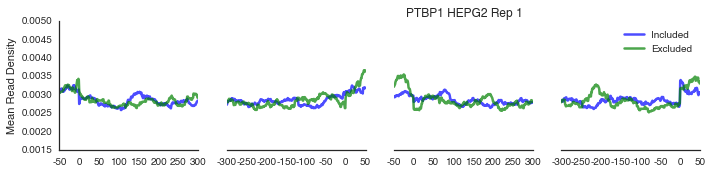

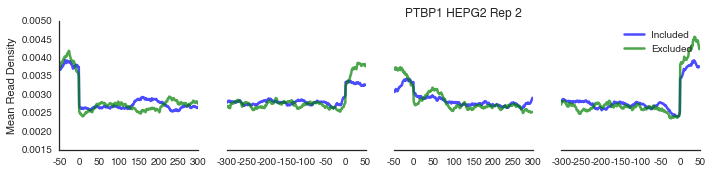

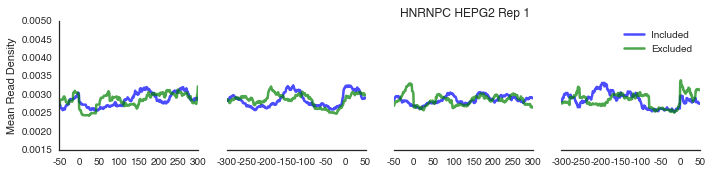

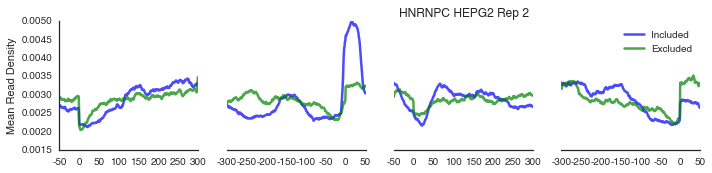

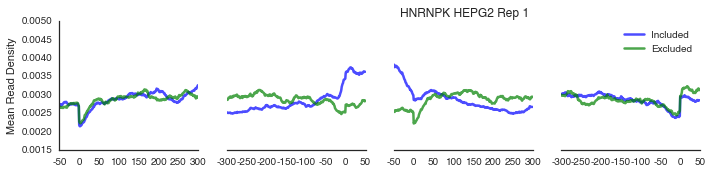

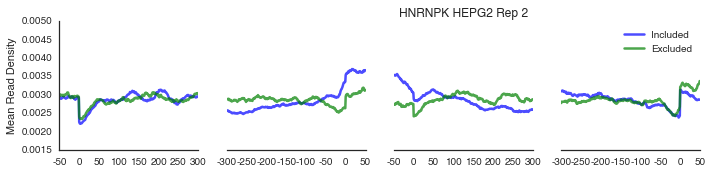

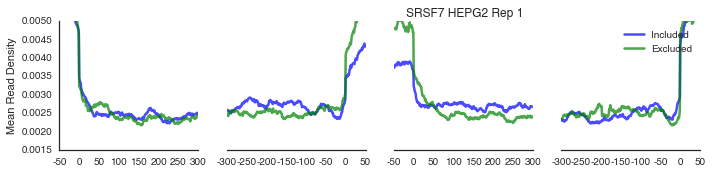

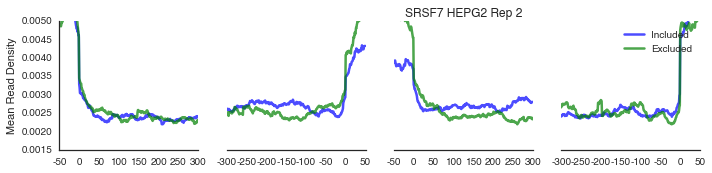

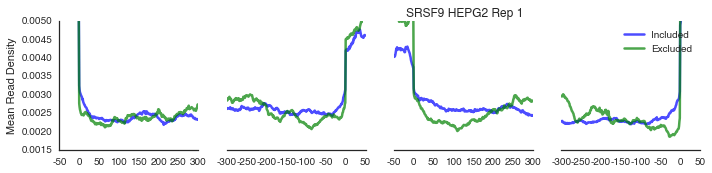

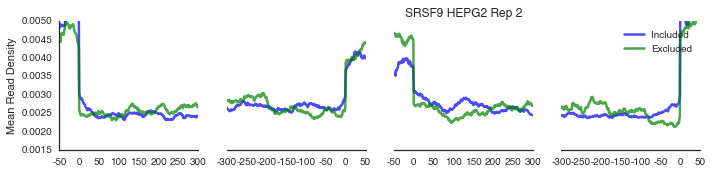

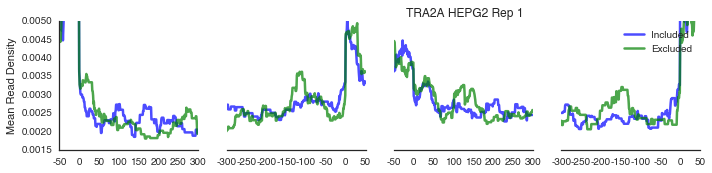

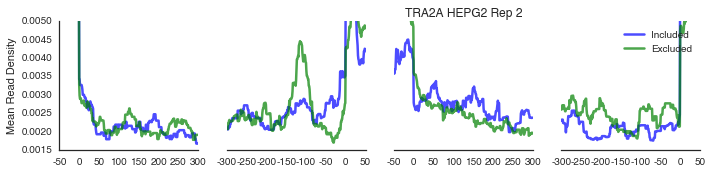

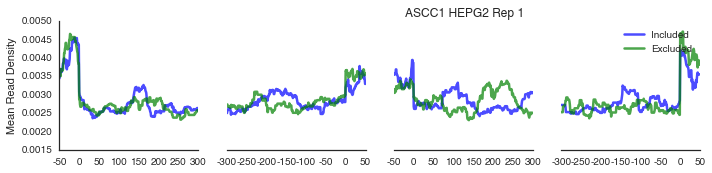

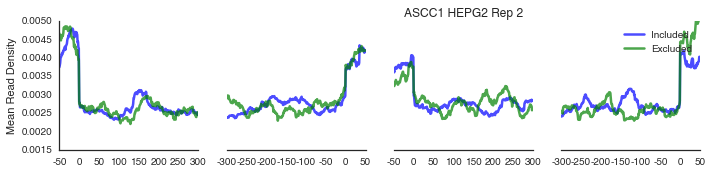

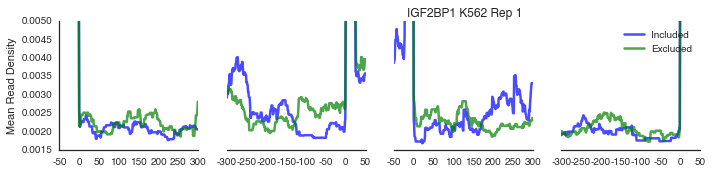

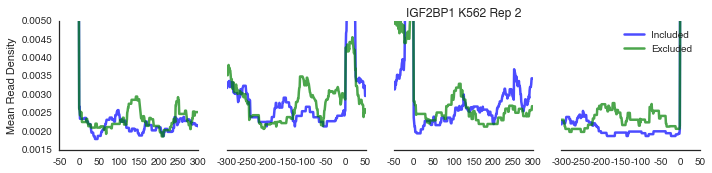

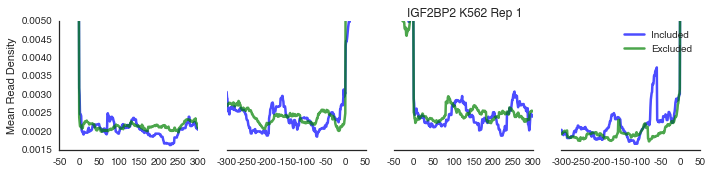

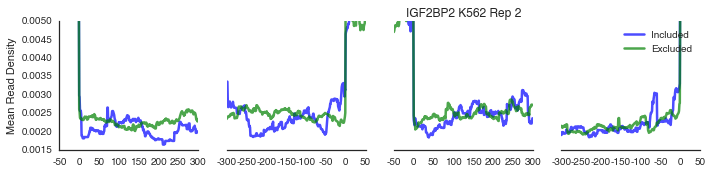

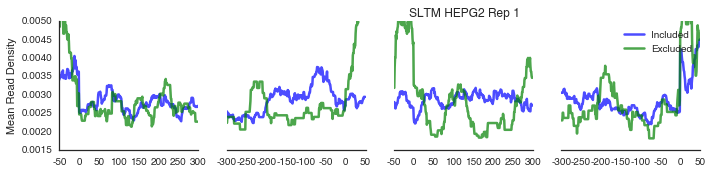

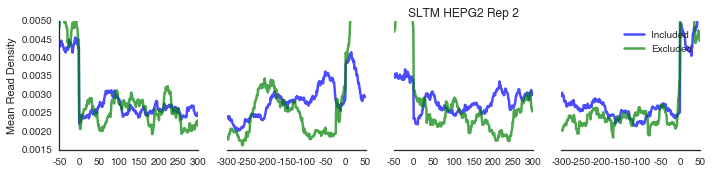

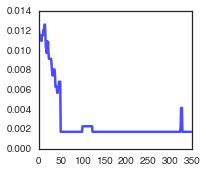

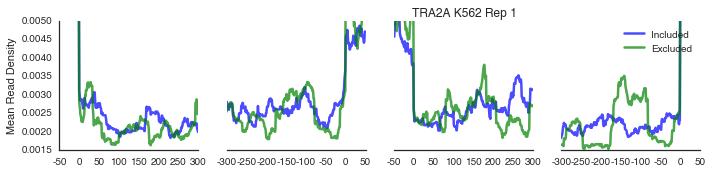

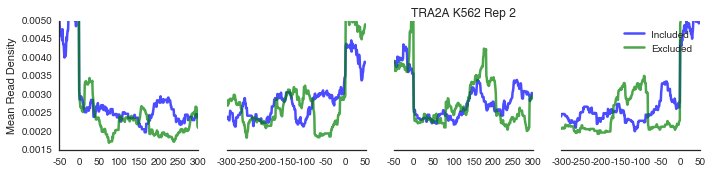

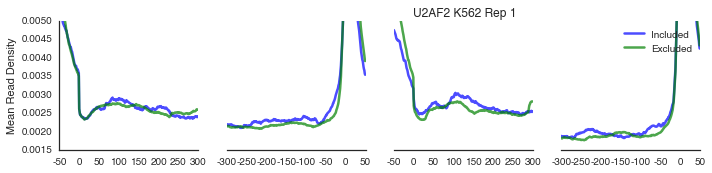

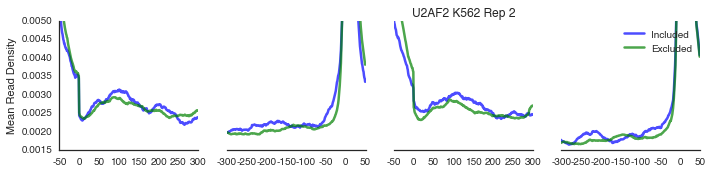

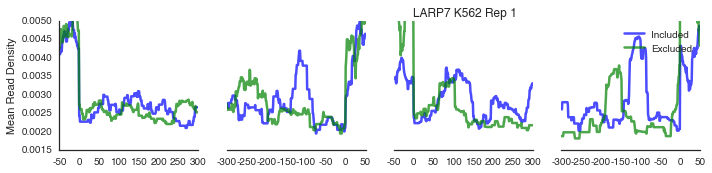

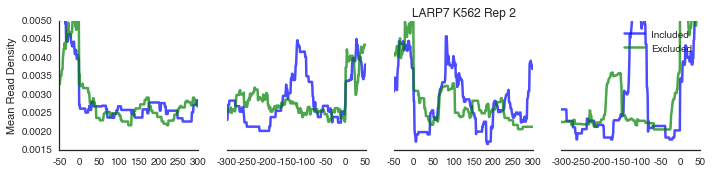

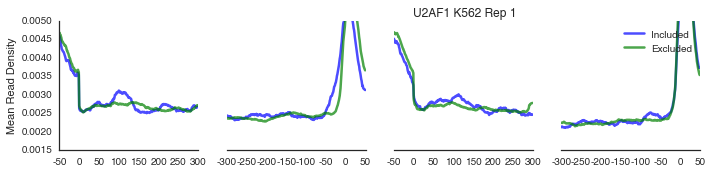

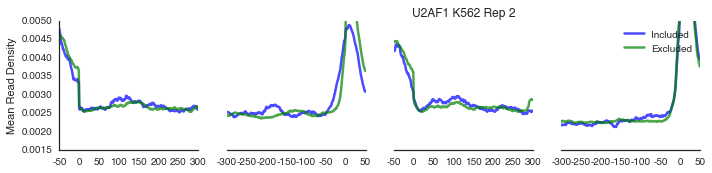

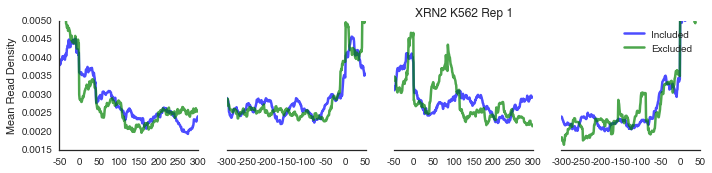

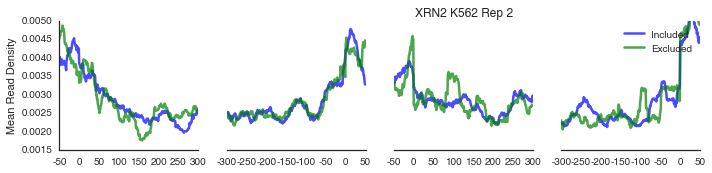

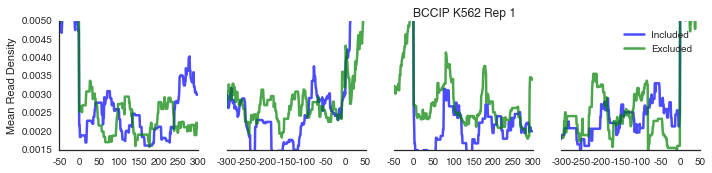

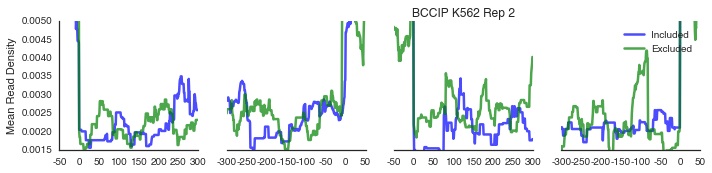

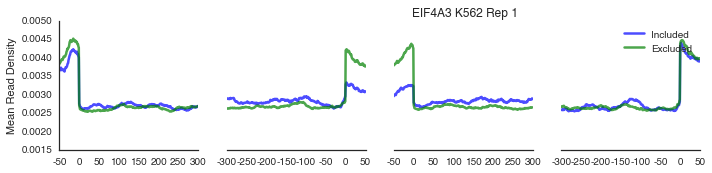

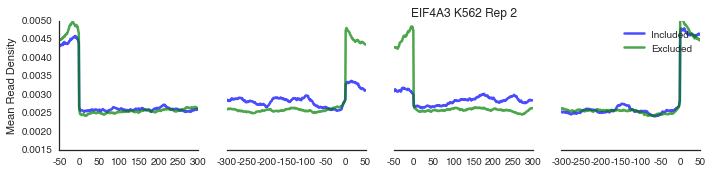

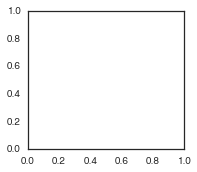

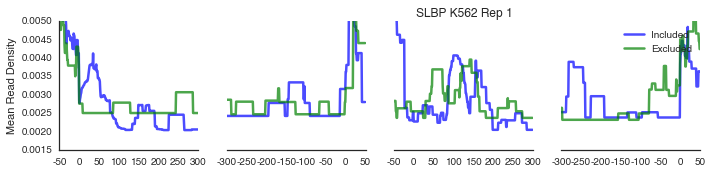

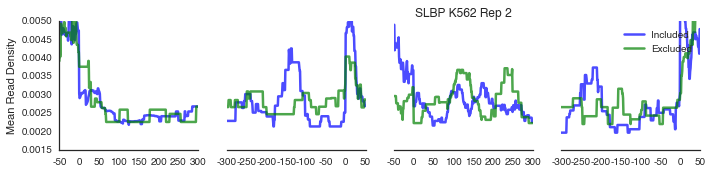

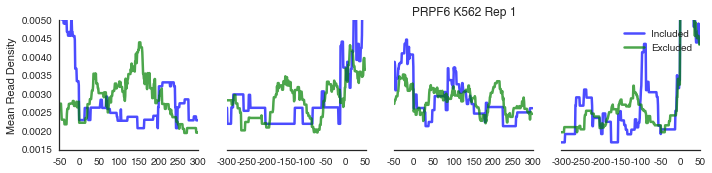

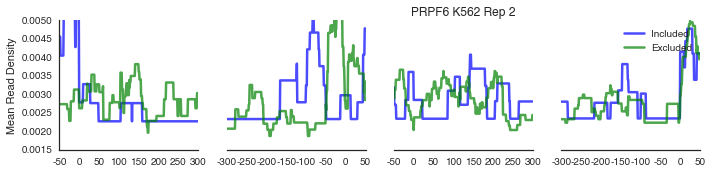

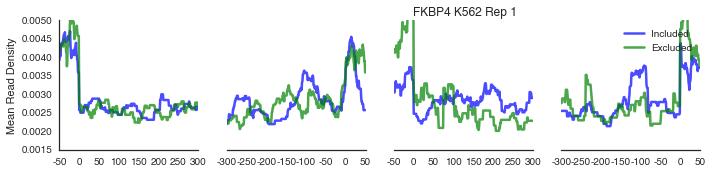

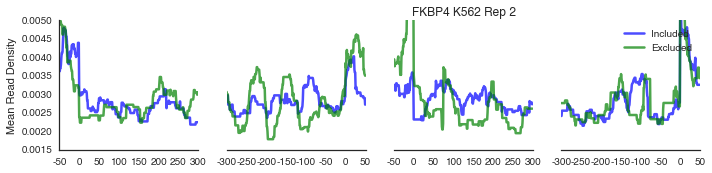

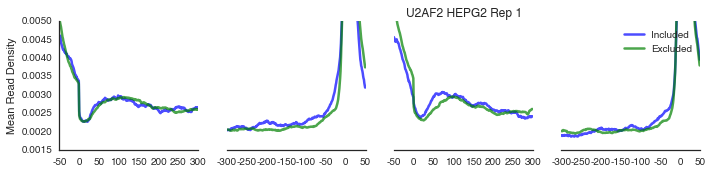

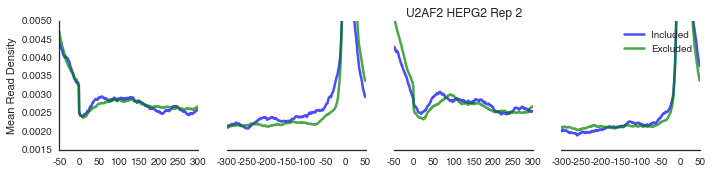

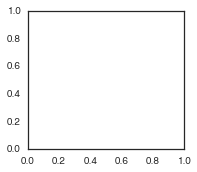

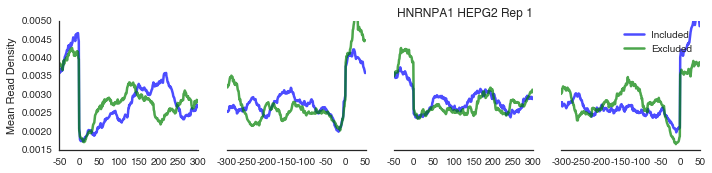

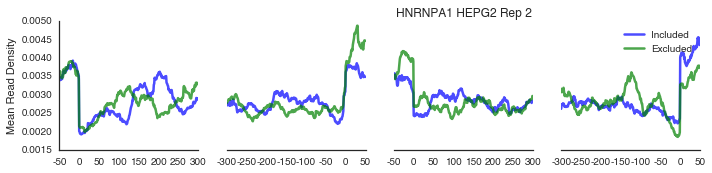

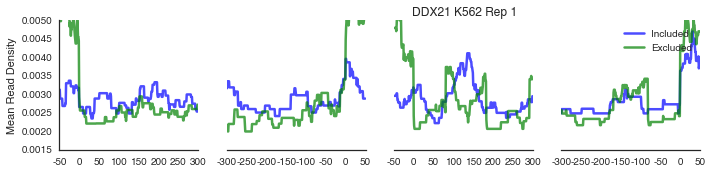

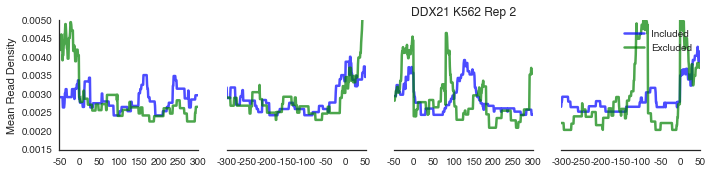

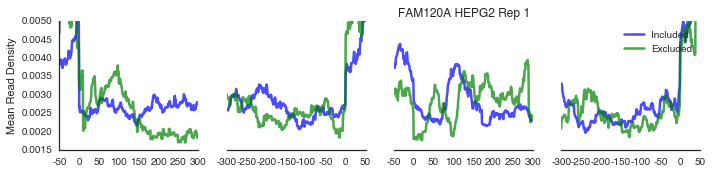

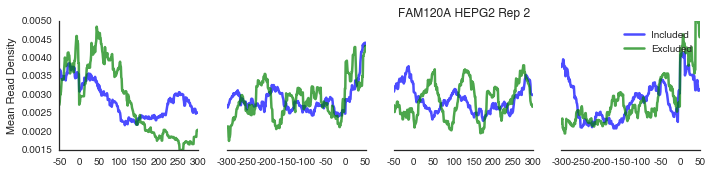

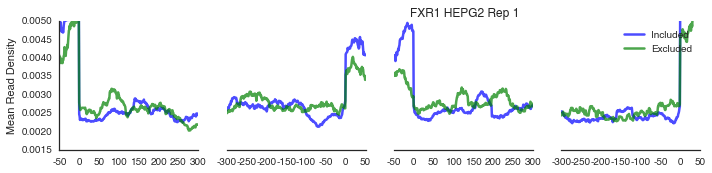

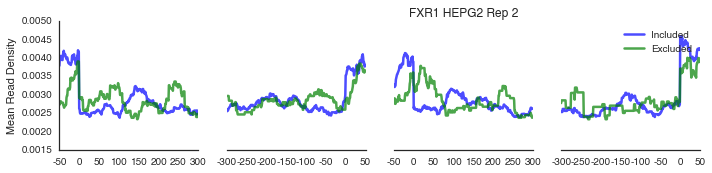

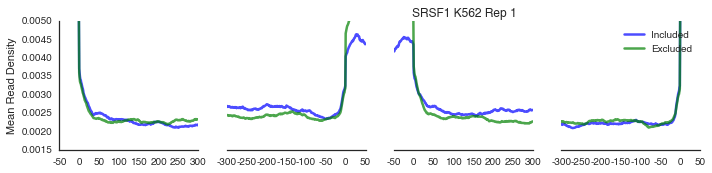

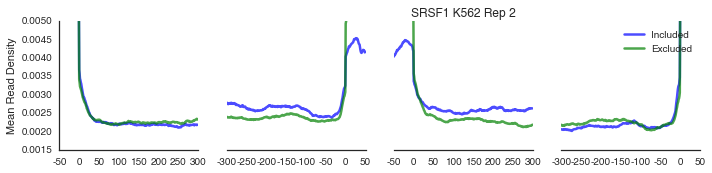

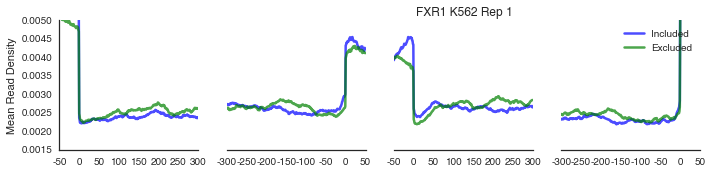

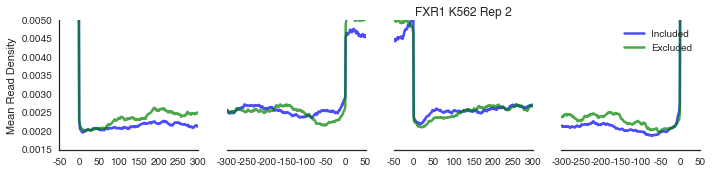

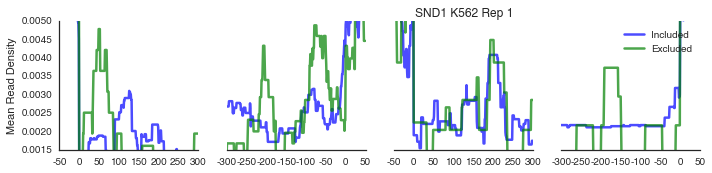

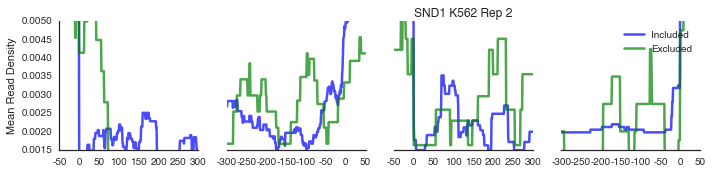

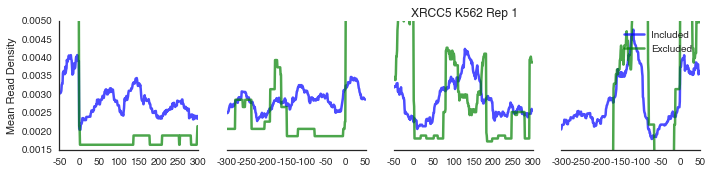

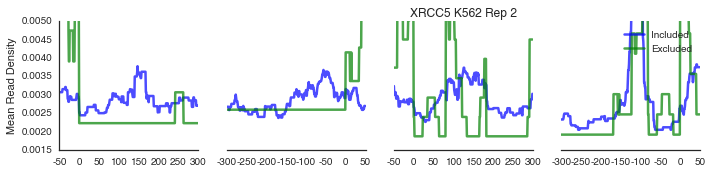

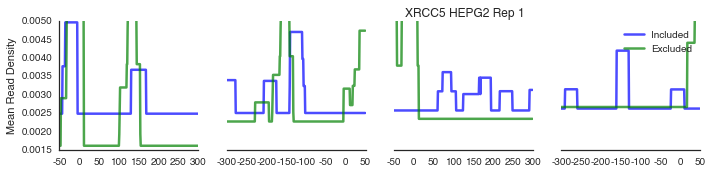

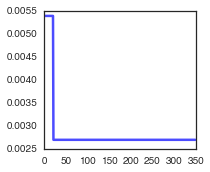

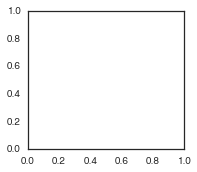

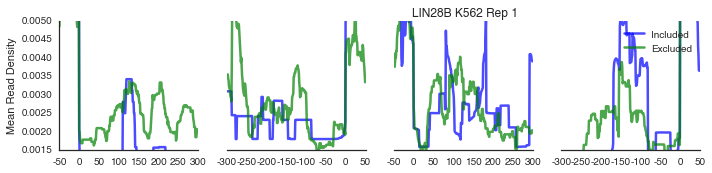

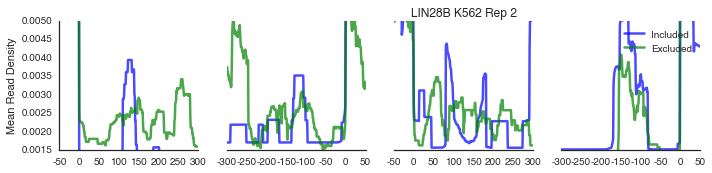

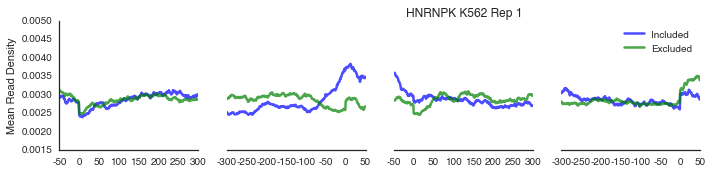

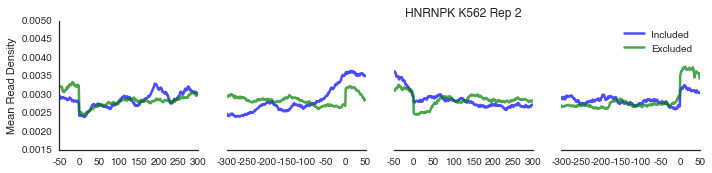

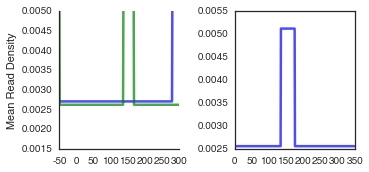

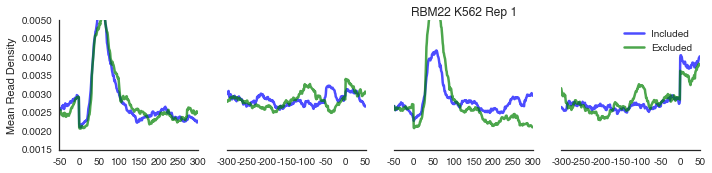

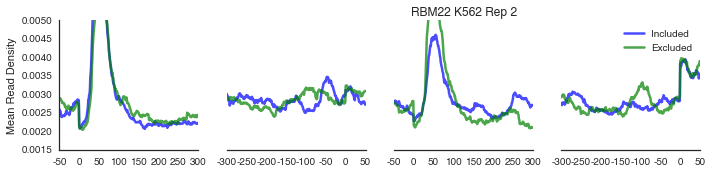

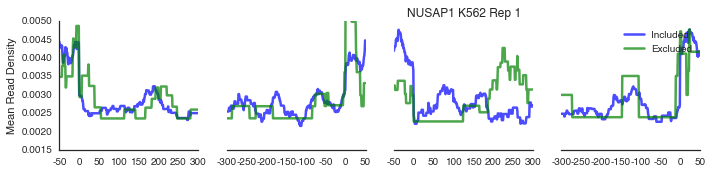

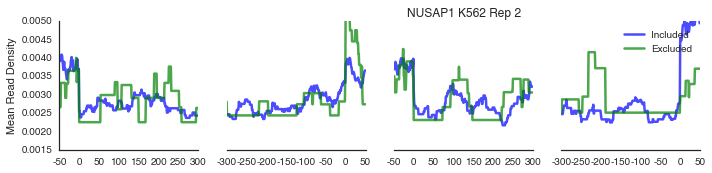

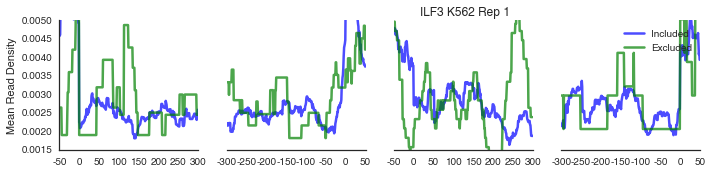

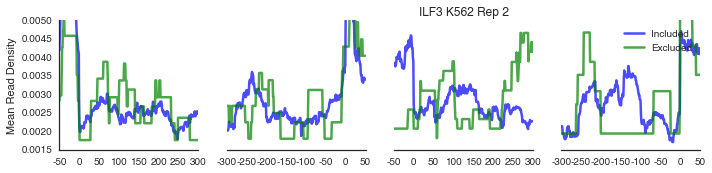

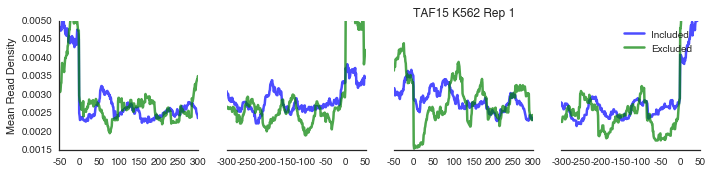

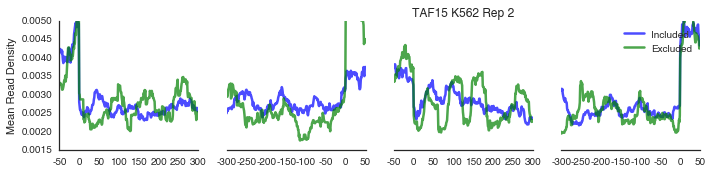

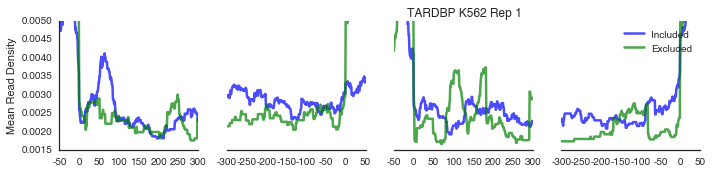

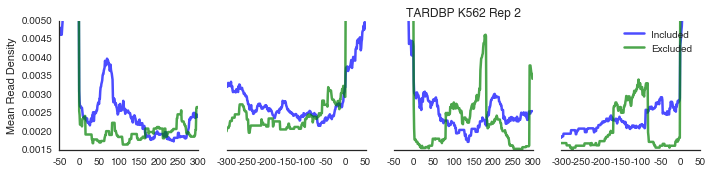

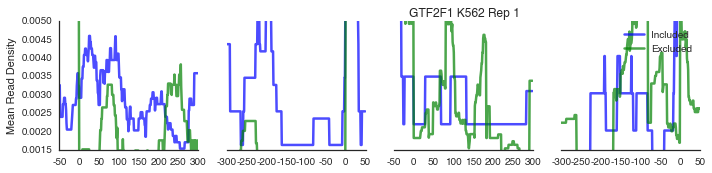

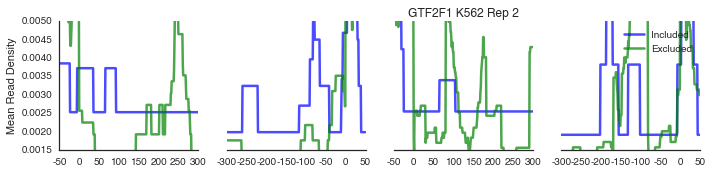

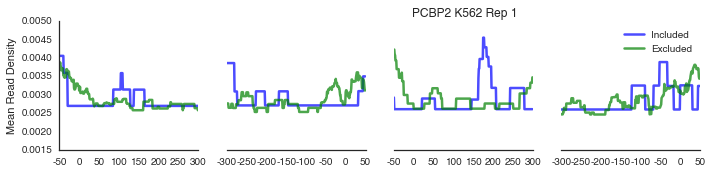

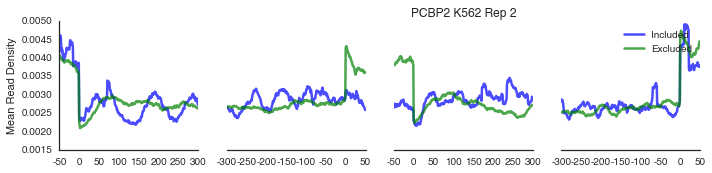

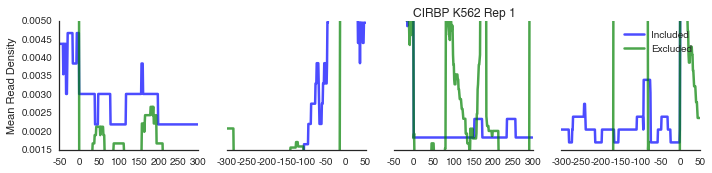

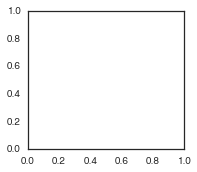

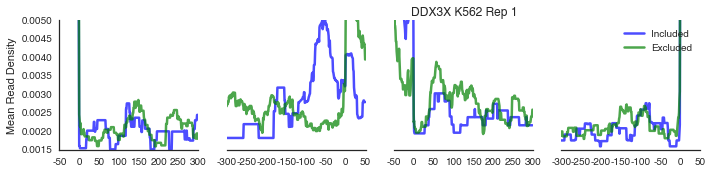

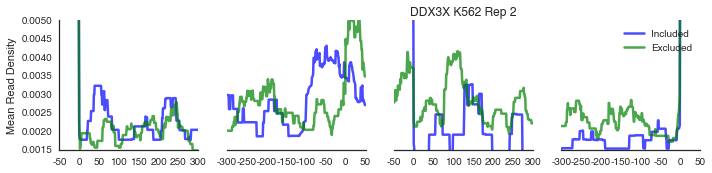

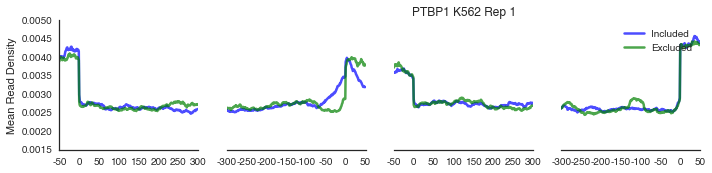

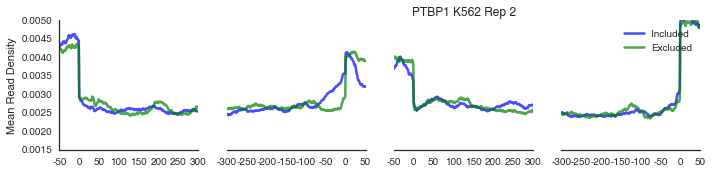

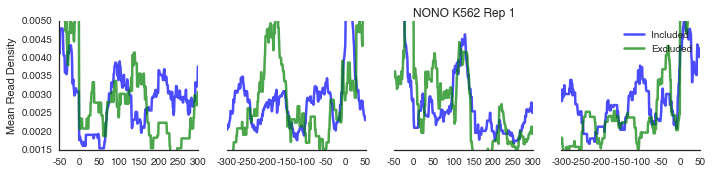

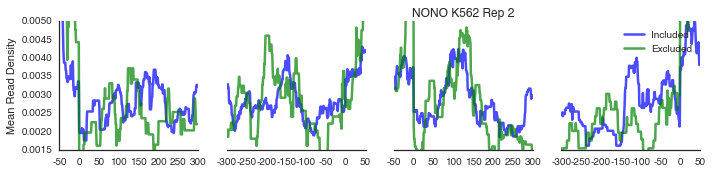

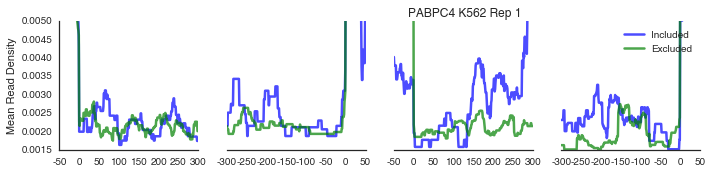

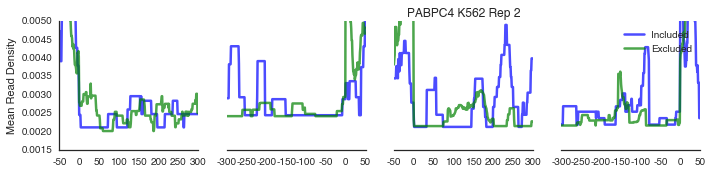

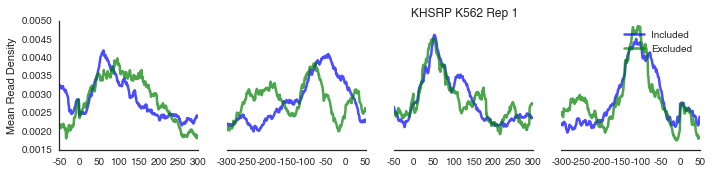

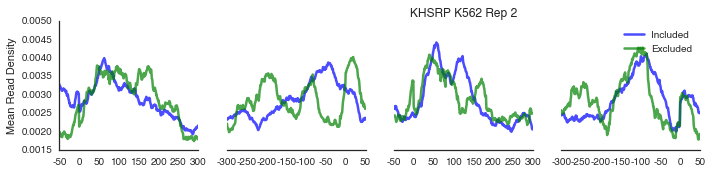

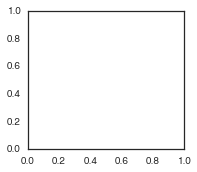

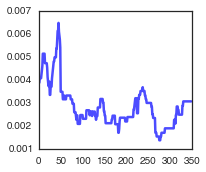

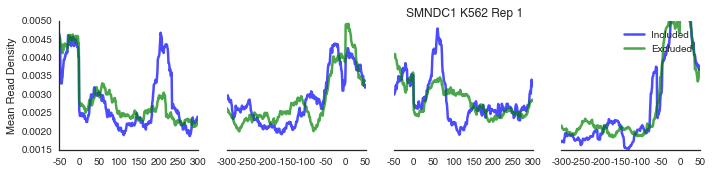

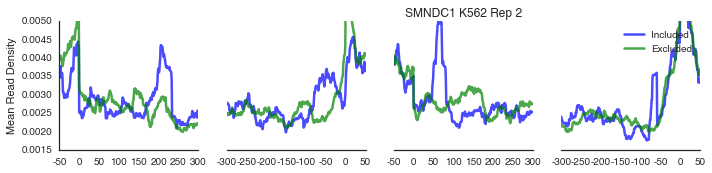

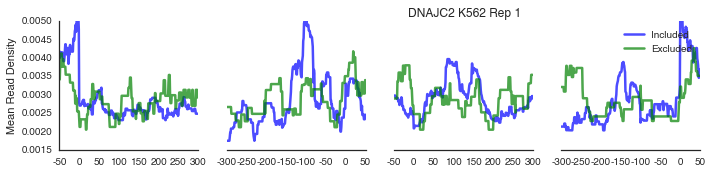

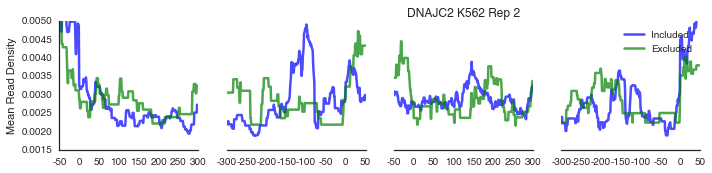

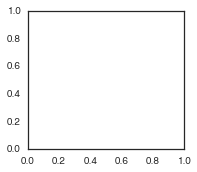

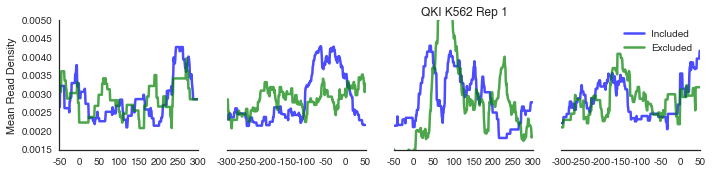

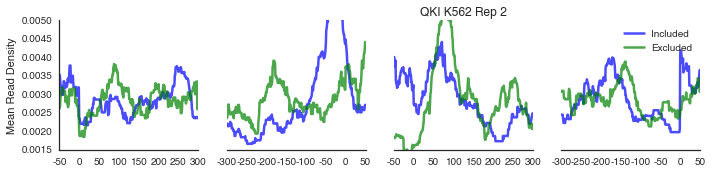

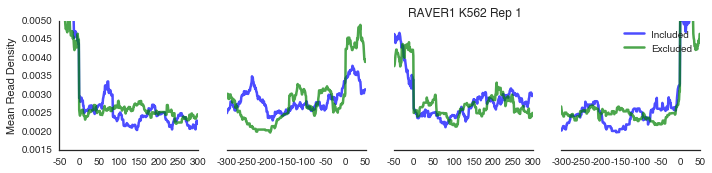

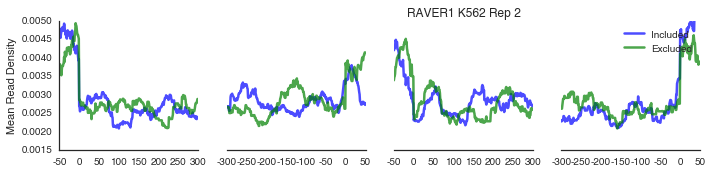

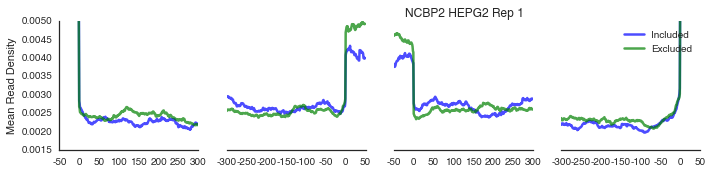

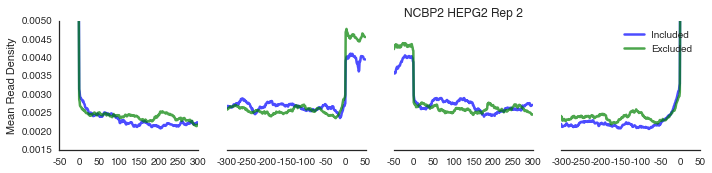

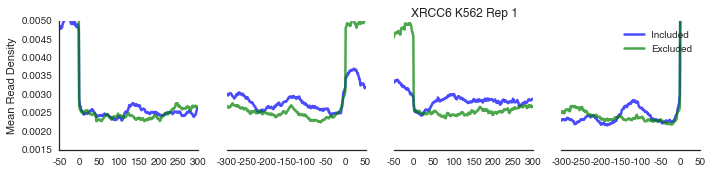

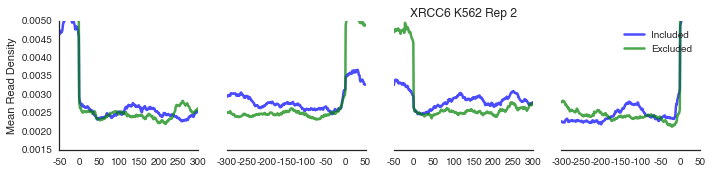

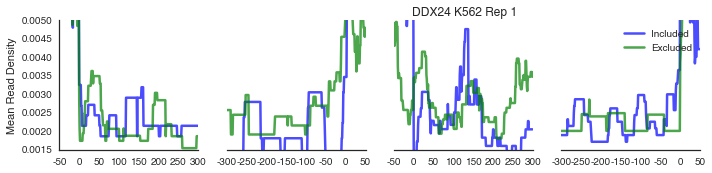

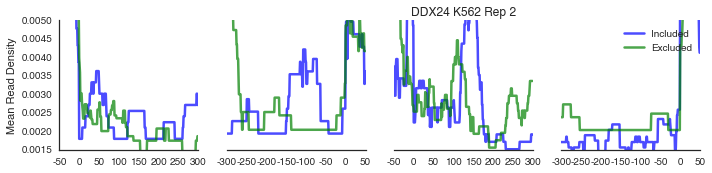

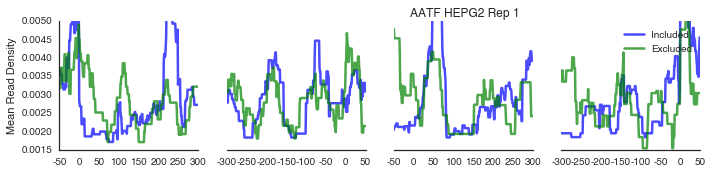

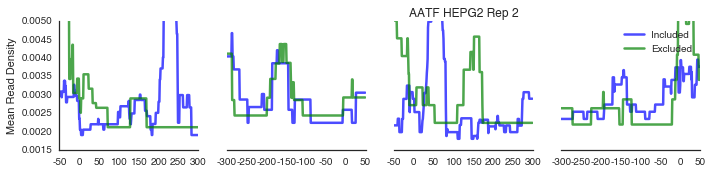

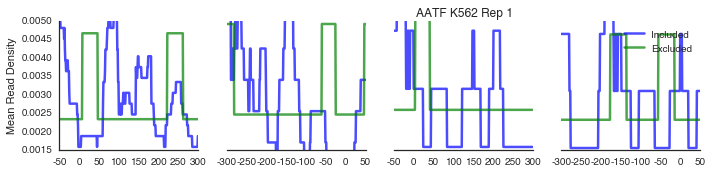

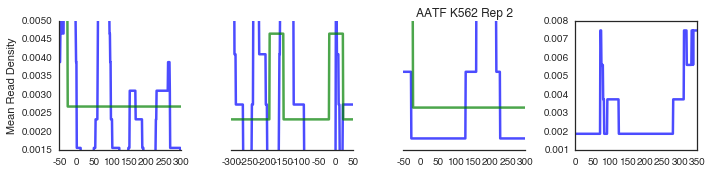

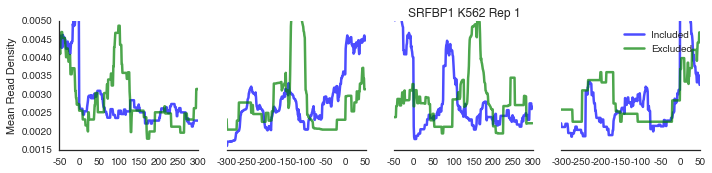

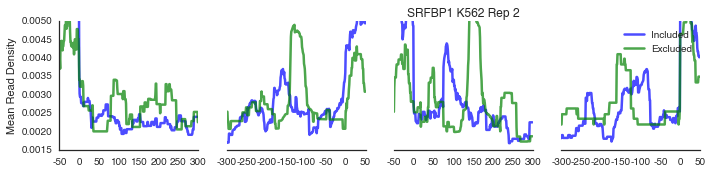

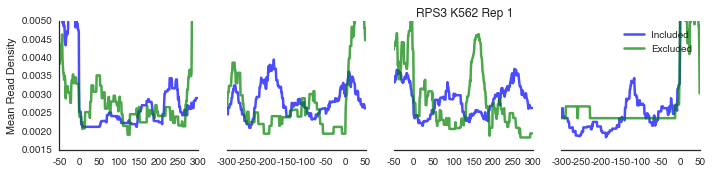

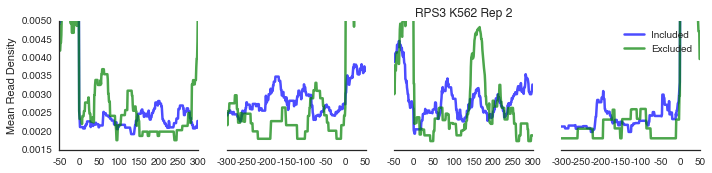

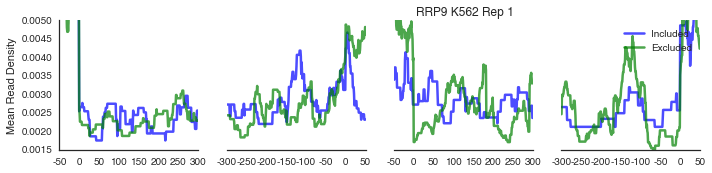

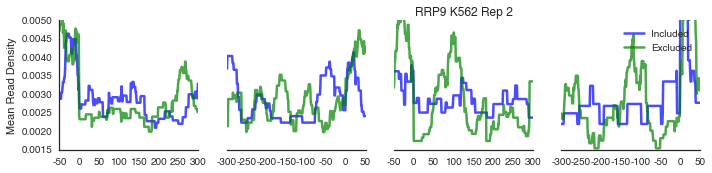

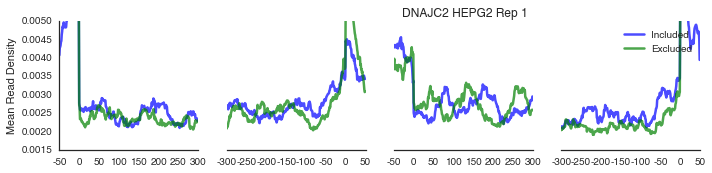

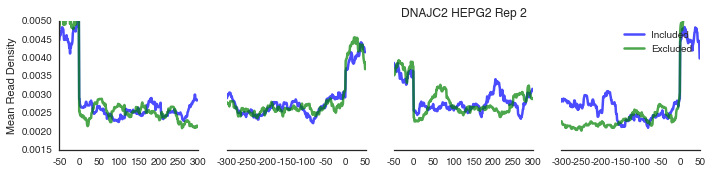

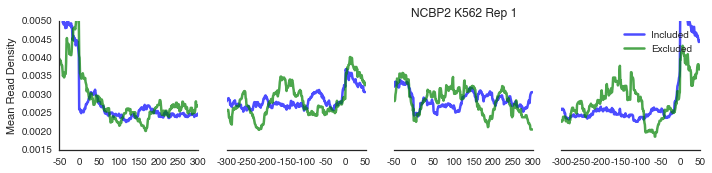

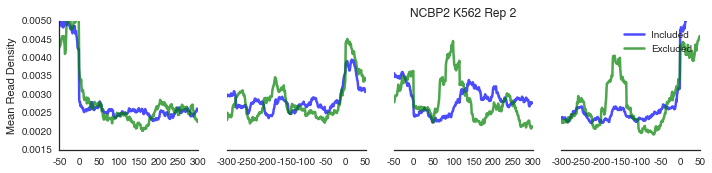

In [65]:
for (uid, rbp, cell_type), df in list(sig_rMATS.groupby(level=["uid", "rbp", "cell_type"])):
    try:
        read_density = splicing_map.ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/{}_01_{}.merged.r2.norm.neg.bw".format(uid, rbp), 
                                   neg="/projects/ps-yeolab2/encode/analysis/encode_v12/{}_01_{}.merged.r2.norm.pos.bw".format(uid, rbp))

        splicing_map.plot_splice_map(read_density, df, "{} {} Rep 1".format(rbp, cell_type),  os.path.join(img_dir, "{}_01_{}.splice_map.svg".format(uid, rbp)))

        read_density = splicing_map.ReadDensity(pos="/projects/ps-yeolab2/encode/analysis/encode_v12/{}_02_{}.merged.r2.norm.neg.bw".format(uid, rbp), 
                                   neg="/projects/ps-yeolab2/encode/analysis/encode_v12/{}_02_{}.merged.r2.norm.pos.bw".format(uid, rbp))

        splicing_map.plot_splice_map(read_density, df, "{} {} Rep 2".format(rbp, cell_type),  os.path.join(img_dir, "{}_02_{}.splice_map.svg".format(uid, rbp)))
        
    except Exception as e:
        print e
        print uid, rbp, cell_type